In [85]:
import matplotlib.pyplot as plt


In [86]:
m_val = 2000
t = m_val


In [87]:
non_taxable = 510
iin = 0.255
vsaa_employee = 0.105
vsaa_employer = 0.2359 # goes on top of gross salary
uin = 0.255


In [88]:
def calculate(gross_salary, with_p3=False):
    vsaa_tax = vsaa_employee*gross_salary
    taxable_income = gross_salary-non_taxable-vsaa_tax
    reclaimed_taxes = 0
    if with_p3:
        reclaimed_taxes = iin*max(taxable_income, min(gross_salary/10, 4000/12))
    net_salary = gross_salary-vsaa_tax-iin*taxable_income
    employer_expenses = (vsaa_employer+1)*gross_salary
    return (net_salary, employer_expenses, (1-uin)*(t-employer_expenses), reclaimed_taxes)
    

In [89]:
t = calculate(m_val)[1]


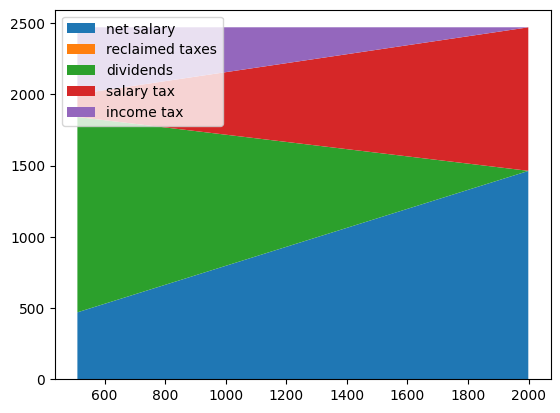

In [90]:
x = range(non_taxable, m_val)

data = [calculate(i, False) for i in x]
net_salaries = [d[0] for d in data]
dividends = [d[2] for d in data]
reclaimed_taxes = [d[3] for d in data]
salary_tax = [d[1]-d[0]-d[3] for d in data]
tax = [t-net_salaries[i]-dividends[i]-salary_tax[i]-reclaimed_taxes[i] for i in range(len(net_salaries))]

# Basic stacked area chart.
plt.stackplot(x, net_salaries, reclaimed_taxes, dividends, salary_tax, tax, labels=['net salary', 'reclaimed taxes', 'dividends', 'salary tax', 'income tax'])
plt.legend(loc='upper left')
